In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Gun_Violence_Record_Orignal.csv')

In [3]:
df.head()

,Case #,Shooter Last Name,Shooter First Name,Full Date,Day of Week,Day,Month,Year,State,State Code,...,Planning,Performance,Interest in Firearms,Firearm Proficiency,Total Firearms Brought to the Scene,Other Weapons or Gear,On-Scene Outcome,Attempt to Flee,Insanity Defense,Criminal Sentence
0,1,Whitman,Charles,8/1/66,Monday,1,8,1966,TX,43,...,1.0,0.0,1.0,3.0,7.0,1.0,1.0,0.0,2.0,0.0
1,2,Smith,Robert,11/12/66,Saturday,12,11,1966,AZ,3,...,1.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0
2,3,Held,Leo,10/23/67,Monday,23,10,1967,PA,38,...,0.0,0.0,1.0,3.0,2.0,1.0,1.0,0.0,2.0,0.0
3,4,Pearson,Eric,3/16/68,Saturday,16,3,1968,MI,22,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,3.0
4,5,Lambright,Donald,4/5/69,Saturday,5,4,1969,PA,38,...,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,2.0,0.0


**Handling null values**

In [4]:
df['Age'].isnull().sum()

1

In [5]:
len(df.columns)

133

In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [7]:
df['Age'].isnull().sum()

0

In [8]:
df['Age'].describe()

count    181.000000
mean      33.822222
std       12.342859
min       11.000000
25%       24.000000
50%       33.000000
75%       43.000000
max       70.000000
Name: Age, dtype: float64

**Data Visualization**

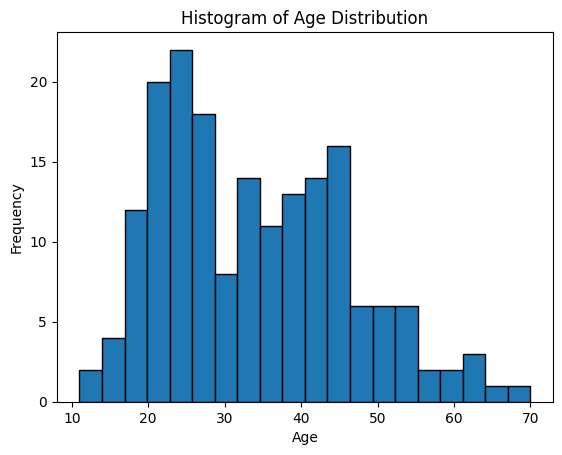

In [9]:
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution')
plt.show()

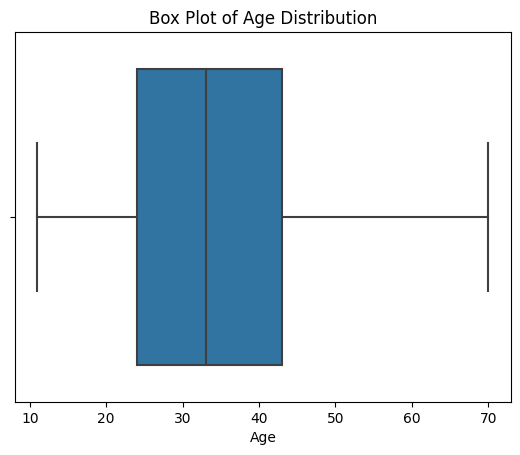

In [10]:
import seaborn as sns

sns.boxplot(x=df['Age'])
plt.xlabel('Age')
plt.title('Box Plot of Age Distribution')
plt.show()

In [11]:
# Define age groups
bins = [0, 18, 30, 50, 100]
labels = ['0-18', '19-30', '31-50', '51+']

# Create a new column with age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Analyze the count of individuals in each age group
age_group_counts = df['Age Group'].value_counts()
print(age_group_counts)

31-50    78
19-30    74
51+      21
0-18      8
Name: Age Group, dtype: int64


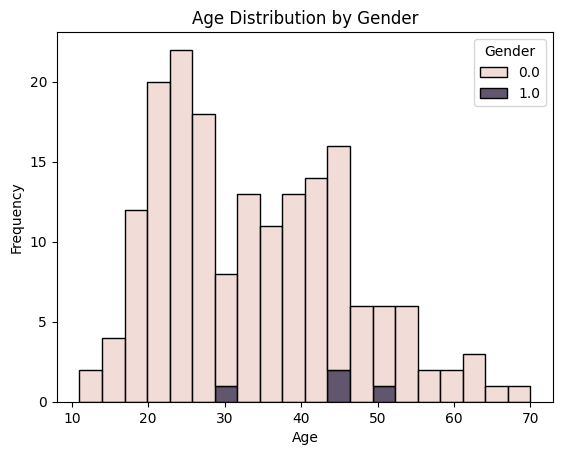

In [12]:
sns.histplot(data=df, x='Age', hue='Gender', multiple='stack', bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Gender')
plt.show()

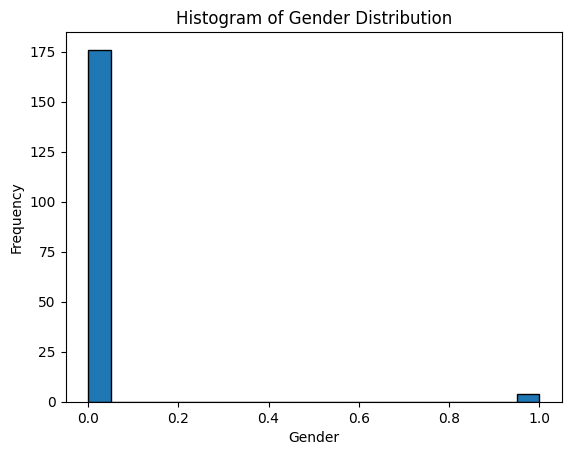

In [13]:
import matplotlib.pyplot as plt

plt.hist(df['Gender'], bins=20, edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Histogram of Gender Distribution')
plt.show()

In [14]:
df['Year'].describe()

count     181.000000
mean     2001.519337
std        14.473190
min      1966.000000
25%      1992.000000
50%      2004.000000
75%      2014.000000
max      2022.000000
Name: Year, dtype: float64

In [15]:
df['Year'].isnull().sum()

0

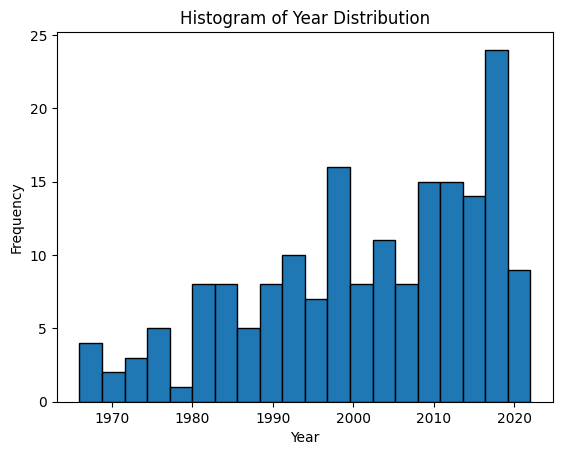

In [16]:
import matplotlib.pyplot as plt

plt.hist(df['Year'], bins=20, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of Year Distribution')
plt.show()

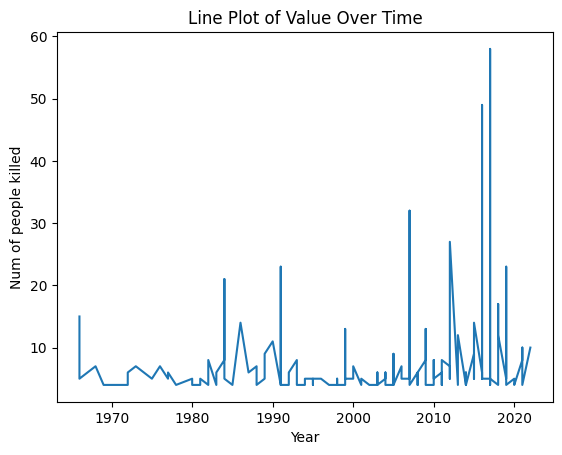

In [20]:
plt.plot(df['Year'], df['Number Killed'])
plt.xlabel('Year')
plt.ylabel('Num of people killed')
plt.title('Line Plot of Value Over Time')
plt.show()

In [19]:
df['Year'].value_counts().sort_index()

1966    2
1967    1
1968    1
1969    1
1970    1
1972    2
1973    1
1975    1
1976    1
1977    3
1978    1
1980    3
1981    2
1982    3
1983    3
1984    4
1985    1
1986    1
1987    1
1988    3
1989    2
1990    1
1991    5
1992    4
1993    6
1994    2
1995    3
1996    2
1997    4
1998    4
1999    8
2000    3
2001    4
2002    1
2003    4
2004    3
2005    4
2006    4
2007    4
2008    5
2009    5
2010    5
2011    4
2012    6
2013    5
2014    3
2015    6
2016    5
2017    7
2018    9
2019    8
2020    2
2021    6
2022    1
Name: Year, dtype: int64

In [21]:
df['State'].isnull().sum()

0

In [22]:
df['State'].unique()

array(['TX', 'AZ', 'PA', 'MI', 'NY', 'NC', 'NJ', 'LA', 'CA', 'OR', 'RI',
       'KY', 'AK', 'FL', 'AR', 'OK', 'IL', 'IA', 'CO', 'WA', 'MS', 'NH',
       'SC', 'CT', 'NV', 'GA', 'HI', 'MA', 'IN', 'AL', 'ID', 'KS', 'WI',
       'OH', 'MN', 'UT', 'VA', 'NE', 'MO', 'DC', 'TN', 'MD'], dtype=object)

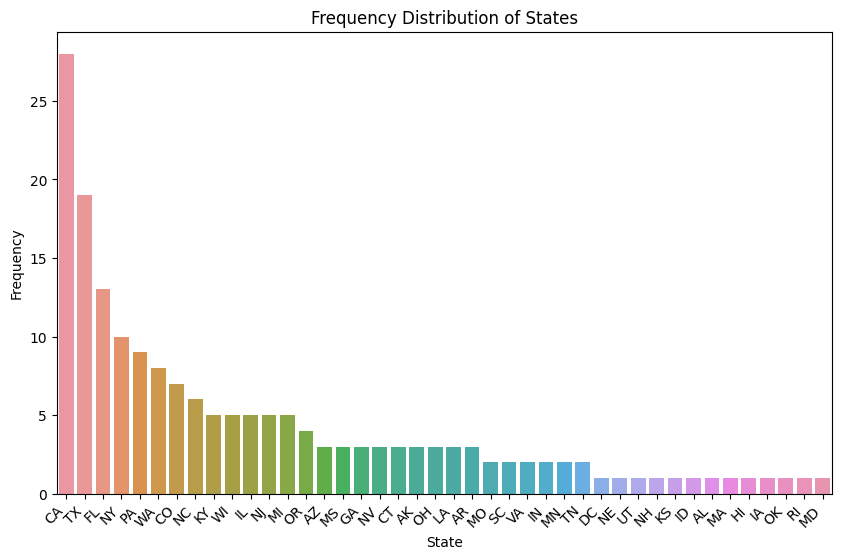

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='State', data=df, order=df['State'].value_counts().index)
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of States')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
state_summary = df.groupby('State')['Number Killed'].sum()
print(state_summary)

State
AK     18
AL      4
AR     15
AZ     15
CA    192
CO     60
CT     39
DC     12
FL    130
GA     24
HI      7
IA      5
ID      4
IL     24
IN     12
KS      5
KY     28
LA     16
MA      7
MD      5
MI     25
MN     15
MO     10
MS     15
NC     29
NE      8
NH      4
NJ     24
NV     66
NY     59
OH     20
OK     14
OR     23
PA     48
RI      4
SC     13
TN      9
TX    180
UT      5
VA     44
WA     38
WI     28
Name: Number Killed, dtype: int64
